In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
#extract the base filename
def extract_label(img_path,train = True):
    filename, _ = os.path.splitext(os.path.basename(img_path))
# split the filename 
    subject_id, etc = filename.split('__')

    if train:
      gender, lr, finger, _, _ = etc.split('_')
    else:
      gender, lr, finger, _ = etc.split('_')
# select 0 for male and 1 for female
    gender = 0 if gender == 'M' else 1
    lr = 0 if lr == 'Left' else 1
    #The code converts the finger information to numerical representations.
    #Each finger type is mapped to a numeric value (0, 1, 2, 3, 4).
    if finger == 'thumb':
      finger = 0
    elif finger == 'index':
      finger = 1
    elif finger == 'middle':
      finger = 2
    elif finger == 'ring':
      finger = 3
    elif finger == 'little':
      finger = 4
    return np.array([gender], dtype=np.uint16)

The function extract_label processes the filename to extract gender, left/right, and finger information and converts them to numerical representations. It is used to prepare the label information for fingerprint data in a dataset, making it easier to use in machine learning models for classification tasks.

In [5]:
img_size = 96  

def loading_data(path,boolean):
    #a flag to indicate if the data is from the training set or not and store in a list
    data = []
    for img in os.listdir(path):# loop to iterate through each file in the specified directory
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            img_resize = cv2.resize(img_array, (img_size, img_size))
            label = extract_label(os.path.join(path, img),boolean)
#After processing all the images,return the data list,
            data.append([label[0], img_resize ])
            if len(data) % 1000 == 0:
                print(len(data))
    return data

In [6]:
#LOAD THE DATASET
Real_path = "C:\\Users\\Hp\\Desktop\\ML PROJECT\\fingerprint_datasets\\Real"
Easy_path = "C:\\Users\\Hp\\Desktop\\ML PROJECT\\fingerprint_datasets\\Altered\\Altered-Easy"
Medium_path = "C:\\Users\\Hp\\Desktop\\ML PROJECT\\fingerprint_datasets\\Altered\\Altered-Medium"
Hard_path = "C:\\Users\\Hp\\Desktop\\ML PROJECT\\fingerprint_datasets\\Altered\\Altered-Hard"

Real_data= loading_data(Real_path,False)
# to loop through the altered medium and hard sub folders
"""Medium_data = loading_data(Medium_path, False)
Hard_data = loading_data(Hard_path, False)

Easy_data = loading_data(Easy_path,True)"""

1000
2000
3000
4000
5000
6000


'Medium_data = loading_data(Medium_path, False)\nHard_data = loading_data(Hard_path, False)\n\nEasy_data = loading_data(Easy_path,True)'

In [7]:
#separate the labels and image features into separate lists (labels and img).
img, labels = [], []
for label, feature in Real_data:
    labels.append(label)
    img.append(feature)
train_data = np.array(img).reshape(-1, img_size, img_size, 1)
train_data = train_data / 255.0

In [8]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(labels, num_classes=2)

In [9]:
# Convert `labels` list to a NumPy array
labels = np.array(labels)

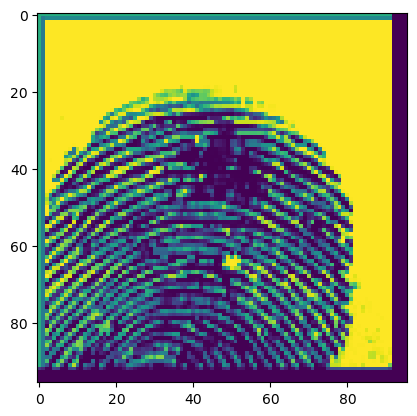

In [10]:
# Now, you can display the image at index 1000 using plt.imshow()
plt.imshow(train_data[300])

In [11]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras import layers
from tensorflow.keras import optimizers

# Create a Sequential model
model = Sequential([
    # First Convolutional layer with 32 filters, kernel size 3x3, 'relu' activation, and 'he_uniform' weight initialization.
    Conv2D(32, 3, padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=[96, 96, 1]),
    # MaxPooling layer to reduce the spatial dimensions by 2x2
    MaxPooling2D(2),
    # Second Convolutional layer with 32 filters, kernel size 3x3, 'relu' activation, and 'he_uniform' weight initialization.
    Conv2D(32, 3, padding='same', kernel_initializer='he_uniform', activation='relu'),
    # MaxPooling layer to reduce the spatial dimensions by 2x2
    MaxPooling2D(2),
    # Flatten layer to convert 2D feature maps into a 1D vector
    Flatten(),
    # Fully connected Dense layer with 128 neurons, 'relu' activation, and 'he_uniform' weight initialization.
    Dense(128, kernel_initializer='he_uniform', activation='relu'),
    # Output Dense layer with 1 neuron and 'sigmoid' activation for binary classification.
    Dense(1, activation='sigmoid'),
])

# Print the model summary to see the architecture and the number of parameters.
model.summary()

# Compile the model with Adam optimizer, binary cross-entropy loss for binary classification, and accuracy as the evaluation metric.
model.compile(optimizer=optimizers.Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback to stop training if the validation loss doesn't improve for 10 epochs.
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 128)               2

In [12]:
#print the data type of the labels variable.
type(labels)


numpy.ndarray

In [13]:
# train the model
history = model.fit(train_data, labels, batch_size = 128, epochs = 5, 
        #25% of the training data will be used for validation.
          validation_split = 0.25, callbacks = [early_stopping_cb], verbose = 1)


Epoch 1/5
36/36 [==============================] - 59s 1s/step - loss: 1.3701 - accuracy: 0.7667 - val_loss: 0.5072 - val_accuracy: 0.7867
Epoch 2/5
36/36 [==============================] - 40s 1s/step - loss: 0.4832 - accuracy: 0.7978 - val_loss: 0.4858 - val_accuracy: 0.7867
Epoch 3/5
36/36 [==============================] - 41s 1s/step - loss: 0.4612 - accuracy: 0.7980 - val_loss: 0.4837 - val_accuracy: 0.7947
Epoch 4/5
36/36 [==============================] - 42s 1s/step - loss: 0.4519 - accuracy: 0.8018 - val_loss: 0.4696 - val_accuracy: 0.7960
Epoch 5/5
36/36 [==============================] - 42s 1s/step - loss: 0.4272 - accuracy: 0.8118 - val_loss: 0.4674 - val_accuracy: 0.8000


The number of times the entire training dataset is passed through the model. 
Each epoch consists of one full forward and backward pass.
The fraction of the training data to be used as validation data
verbose=1 means it will display progress bars for each epoch.
The model.fit method will train the model using the provided data and return a history object that contains information about the training process, such as loss and accuracy values at each epoch. This object can be used for further analysis or plotting.
the model will be trained, and you can use the history object to visualize the training process

In [14]:
# load the test data using the loading_data
test_data = loading_data(Real_path,False)

x_test,y_test= [], []
for label, feature in test_data:
    y_test.append(label)
    x_test.append(feature)
# Now you can proceed with the rest of your code, such as converting x_test and y_test to NumPy arrays and normalization if needed.

1000
2000
3000
4000
5000
6000


In [15]:
import numpy as np

x_test = np.array(x_test)
print(x_test.shape)


(6000, 96, 96)


 use the trained model to predict the labels of the test data and evaluate the model's performance on the test set. 

In [16]:

# Make predictions on the test data
predictions = model.predict(x_test)

# Convert probabilities to predicted labels (0 for "Real" and 1 for "Altered")
predicted_labels = (predictions >= 0.5).astype(int).flatten()

# Evaluate the model's performance on the test set
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, predicted_labels)
confusion_mat = confusion_matrix(y_test, predicted_labels)
classification_rep = classification_report(y_test, predicted_labels)

print(f"Test Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep)


188/188 [==============================] - 13s 67ms/step
Test Accuracy: 0.8245
Confusion Matrix:
[[4625  145]
 [ 908  322]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      4770
           1       0.69      0.26      0.38      1230

    accuracy                           0.82      6000
   macro avg       0.76      0.62      0.64      6000
weighted avg       0.81      0.82      0.79      6000



In [17]:
x_test = np.array(x_test).reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)
type(y_test)

numpy.ndarray

In [18]:
model.evaluate(x_test,y_test)

188/188 [==============================] - 14s 75ms/step - loss: 36.4699 - accuracy: 0.8245


[36.469913482666016, 0.8245000243186951]

188/188 [==============================] - 13s 70ms/step
6000


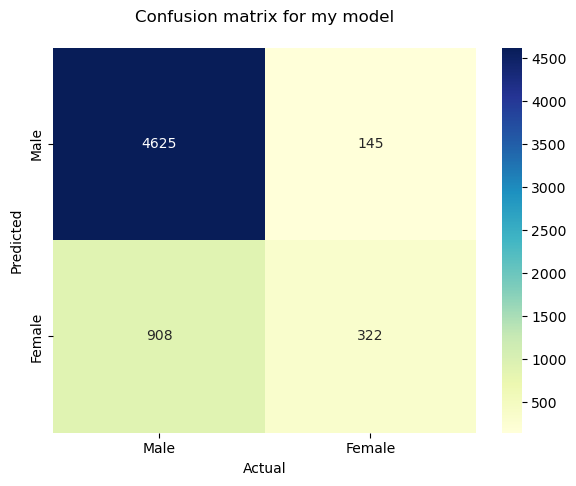

In [19]:

plt.figure(figsize=(15, 5))
# make predictions on the test data 
preds = model.predict(x_test)
preds = (preds >= 0.5).astype(np.int32)
#calculates the confusion matrix 
cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['Male', 'Female'], columns=['Male', 'Female'])
plt.subplot(121)
plt.title("Confusion matrix for my model\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")

print(len(y_test==1))

In [20]:
 #saves the entire model, including the architecture, optimizer state, and learned weights, 
#into a single HDF5 file, format is a popular file format for storing large datasets.
model.save('GenderFP.h5')

C:\Users\Hp\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
"""from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('GenderFP.h5')

# Now you can use the loaded_model for predictions or further training.
"""

"from tensorflow.keras.models import load_model\n\n# Load the model\nloaded_model = load_model('GenderFP.h5')\n\n# Now you can use the loaded_model for predictions or further training.\n"

True:  0
1/1 [==============================] - 0s 45ms/step
predicted:  [0.]



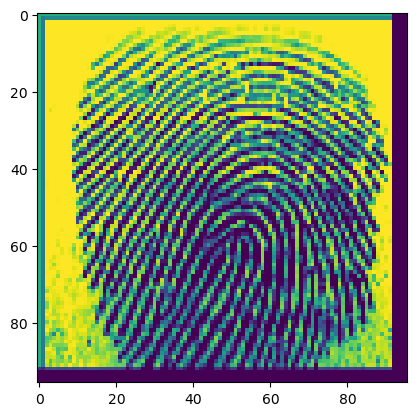

True:  0
1/1 [==============================] - 0s 134ms/step
predicted:  [0.]



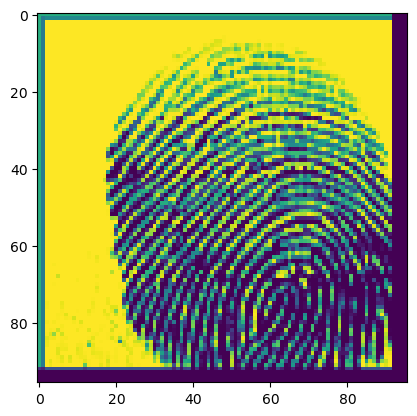

In [22]:
# get the true labels, model predictions, and visualizations for the first 2 samples in the test set
for i in range(2):
    print('True: ',y_test[i])
    print('predicted: ',model.predict(np.expand_dims(x_test[i],0))[0])
    print()
    plt.imshow(x_test[i])
    plt.show()

In [23]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('GenderFP.h5')

# Assuming you have a new fingerprint image `new_fingerprint` that you want to predict the gender for
# Preprocess the new fingerprint image to match the format used during training
import cv2

sample = cv2.imread("fingerprint_datasets/Altered/Altered-hard/1__M_Left_index_finger_CR.BMP")
best_score = 0
filename = None
image = None
kp1, kp2, mp = None, None, None

for file in os.listdir("fingerprint_datasets/Real")[:6000]:
    fingerprint_image = cv2.imread("fingerprint_datasets/Real/" + file)
    sift = cv2.SIFT_create()
    keypoints_1, descriptors_1 = sift.detectAndCompute(sample, None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(fingerprint_image, None)
    
    # Use the FLANN-based matcher for matching keypoints
    index_params = dict(algorithm=1, trees=10)
    search_params = {}
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(descriptors_1, descriptors_2, k=2)
    
    # Apply ratio test to find good matches
    match_points = []
    for p, q in matches:
        if p.distance < 0.7 * q.distance:
            match_points.append(p)
    
    # Calculate the score based on the number of matches and keypoints
    keypoints = min(len(keypoints_1), len(keypoints_2))
    score = len(match_points) / keypoints * 100
    
    if score > best_score:
        best_score = score
        filename = file
        image = fingerprint_image
        kp1, kp2, mp = keypoints_1, keypoints_2, match_points

print("Best matched filename:", filename)
print("Best score:", best_score)

# Draw the matches on the image and show the result
result = cv2.drawMatches(sample, kp1, image, kp2, mp, None)
result = cv2.resize(result, dsize=None, fx=4, fy=4)
cv2.imshow("Result", result)
cv2.waitKey(0)
cv2.destroyAllWindows()


Best matched filename: 491__M_Left_ring_finger.BMP
Best score: 71.42857142857143
